# Anslysis of simulation results

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from iddn_paper import sim3_h5op, tool_draw, tool_sys, tool_eval

# Four layers, 2 edges each regulator, scale-free tf-tf, 100 nodes. 200. diag_scale=None. Pos and Neg items. Remove edges. Not reduce diag.
# exp_name = "sim3_ggm_four_layer_batch_439613"
# Four layers, 2 edges each regulator, scale-free tf-tf, 100 nodes. 200. diag_scale=None. Pos and Neg items. Remove edges. Reduce diag by 0.8
# exp_name = "sim3_ggm_four_layer_batch_987306"
# Three layers, 2 edges each regulator, scale-free mRNA, 100 nodes. 200. Reduce diag by 0.8
# exp_name = "sim3_ggm_three_layer_batch_849165"

# Three layers, 2 edges each regulator, scale-free mRNA, 50+50+50 nodes. 200. Reduce diag by 0.75
# exp_name = "sim3_ggm_three_layer_batch_90470"

# Three layers, 5 edges each regulator, scale-free mRNA, 50+50+50 nodes. 200. Reduce diag by 0.75
exp_name = "sim3_ggm_three_layer_batch_444445"
# exp_name = "sim3_ggm_three_layer_batch_731408"  # repeat 444445
# exp_name = "sim3_ggm_three_layer_batch_444445_1"  # a different range of lambda2

n_sample_work = 200

# 0: do not use post-processing, 2: use full post-processing
msk_level = 2

# False: calculate all edges, True: calculate gene related egdes only
# gene_only = True
gene_only = False

top_folder = tool_sys.get_work_folder() + "sim_iddn_data"
top_folder_R = tool_sys.get_work_folder() + "sim_iddn_data"
dat_file = f"{top_folder}/sim_input/{exp_name}.hdf5"

dat1, dat2, con_mat1, con_mat2, comm_gt, diff_gt, dep_mat_null, dep_mat_prior, dep_mat_prior_loose, layer_count = (
    sim3_h5op.read_sim_data(dat_file)
)


In [19]:
# Make a new mask that focus on selected nodes
n_node = dat1.shape[-1]
n_gene = layer_count[0]
# n_gene = layer_count[0] + layer_count[1]
if gene_only:
    msk_genes = np.zeros((n_node, n_node))
    msk_genes[:n_gene, :n_gene] = 1
else:
    msk_genes = np.ones((n_node, n_node))
    
if msk_level==2:
    msk = dep_mat_prior
elif msk_level==1:
    msk = dep_mat_prior_loose
else:
    msk = dep_mat_null

for i in range(len(msk)):
    msk0 = msk[i]*msk_genes
    msk[i] = msk0


In [20]:
sigma_add = 0.0
f_ddn = f"{top_folder}/sim_output/{exp_name}_ddn_sample_{n_sample_work}_sigma_{sigma_add}.hdf5"
f_iddn = f"{top_folder}/sim_output/{exp_name}_iddn_sample_{n_sample_work}_sigma_{sigma_add}_prior_precise.hdf5"
f_coe = f"{top_folder}/sim_output/{exp_name}_coexpression_sample_{n_sample_work}_sigma_{sigma_add}.hdf5"
f_jgl = f"{top_folder_R}/sim_output/{exp_name}_jgl_sample_{n_sample_work}_sigma_{sigma_add}.hdf5"
f_idingo = f"{top_folder_R}/sim_output/{exp_name}_idingo_sample_{n_sample_work}_sigma_{sigma_add}_3as2_layer.hdf5"

## Read results

In [3]:
res_diff_idingo = None
res_comm_jgl = None
res_diff_jgl = None
res_g1_jgl = None
res_g2_jgl = None
res_comm_iddn = None
res_diff_iddn = None
res_g1_iddn = None
res_g2_iddn = None
res_comm_coe = None
res_diff_coe = None
res_g1_coe = None
res_g2_coe = None

In [4]:
# plt.imshow(dep_mat_prior[0])
# plt.axis('off'))

In [6]:
# Provide mask for methods other than iDDN based on dep_mat_prior
# The ground truth should not contain diagonal elements
reload(tool_eval)

# dep_coe = tool_eval.read_res_h5(f_coe, tt=False)
# res_comm_coe, res_diff_coe, res_g1_coe, res_g2_coe, dep_est_coe, res_g1_lst_coe = tool_eval.gather_res(
#    dep_coe , comm_gt, diff_gt, con_mat1, con_mat2, msk_in=msk
# )

dep_ddn = tool_eval.read_res_h5(f_ddn, tt=False)
res_comm_ddn, res_diff_ddn, res_g1_ddn, res_g2_ddn, dep_est_ddn, _ = tool_eval.gather_res(
    dep_ddn, comm_gt, diff_gt, con_mat1, con_mat2, msk_in=msk
)

dep_iddn = tool_eval.read_res_h5(f_iddn, tt=False)
res_comm_iddn, res_diff_iddn, res_g1_iddn, res_g2_iddn, dep_est_iddn, _ = tool_eval.gather_res(
    dep_iddn, comm_gt, diff_gt, con_mat1, con_mat2, msk_in=msk
)

dep_jgl = tool_eval.read_res_h5(f_jgl, tt=True)
res_comm_jgl, res_diff_jgl, res_g1_jgl, res_g2_jgl, dep_est_jgl, res_g1_lst_jgl = tool_eval.gather_res(
   dep_jgl , comm_gt, diff_gt, con_mat1, con_mat2, msk_in=msk
)

dep_idingo = tool_eval.read_res_h5(f_idingo, tt=True, key="diffscore")
dep_idingo_r1 = tool_eval.read_res_h5(f_idingo, tt=True, key="R1")
dep_idingo_r2 = tool_eval.read_res_h5(f_idingo, tt=True, key="R2")
res_comm_idingo, res_diff_idingo = tool_eval.gather_res_dingo(dep_idingo_r1, dep_idingo_r2, dep_idingo, comm_gt, diff_gt, msk_in=msk)


['dep_est']
(32, 40, 11, 2, 150, 150)
['dep_est']
(32, 40, 11, 2, 150, 150)
['dep_est']
(32, 40, 11, 2, 150, 150)
['diffscore']
(5, 150, 150)


In [7]:
# reload(tool_draw)
# tool_draw.draw_lines_rho1_rho2(
#     # res_ddn=res_g1_ddn,
#     res_iddn=res_g1_iddn,
#     res_jgl=res_g1_jgl,
#     # res_coe=res_g1_coe,
#     title_mean="Condition 1",
#     # xlim=[0.5, 1.02],
# )
# 
# tool_draw.draw_lines_rho1_rho2(
#     # res_ddn=res_g2_ddn,
#     res_iddn=res_g2_iddn,
#     res_jgl=res_g2_jgl,
#     # res_coe=res_g2_coe,
#     title_mean="Condition 2",
#     # xlim=[0.5, 1.02],
# )

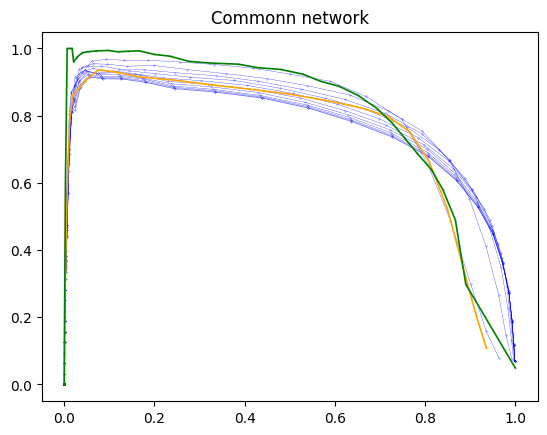

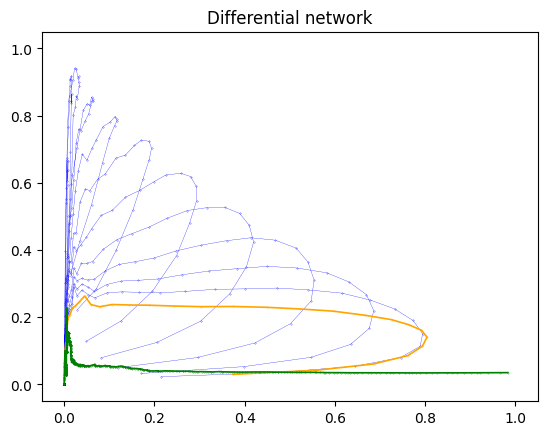

In [30]:
reload(tool_draw)
tool_draw.draw_lines_rho1_rho2_v1(
    # res_lst=[res_comm_iddn, res_comm_jgl],
    res_lst=[res_comm_iddn, res_comm_jgl[:,:1], res_comm_idingo],
    title="Commonn network",
    # line_width=[0.2, 0.2]
    line_width=[0.2, 1.2, 1.2]
)
tool_draw.draw_lines_rho1_rho2_v1(
    # res_lst=[res_diff_iddn, res_diff_jgl],
    res_lst=[res_diff_iddn, res_diff_jgl[:,:1], res_diff_idingo],
    title="Differential network",
    # line_width=[0.2, 0.2]
    line_width=[0.2, 1.2, 1.2]
)


In [9]:
# res_diff_jgl.shape


## Summary plots
- pROC for CDN, choose lambda2 leading to best F1
- F1 for CDN
- F1 for DDN
- Mean F1 for common and differential

In [10]:
reload(tool_eval)

f1_rho1_iddn = tool_eval.get_f1_rho1(res_comm_iddn, res_diff_iddn)
f1_rho1_jgl = tool_eval.get_f1_rho1(res_comm_jgl, res_diff_jgl)
f1_rho1_iddn_pc = tool_eval.get_f1_rho1(res_g1_iddn, res_g2_iddn)
f1_rho1_jgl_pc = tool_eval.get_f1_rho1(res_g1_jgl, res_g2_jgl)


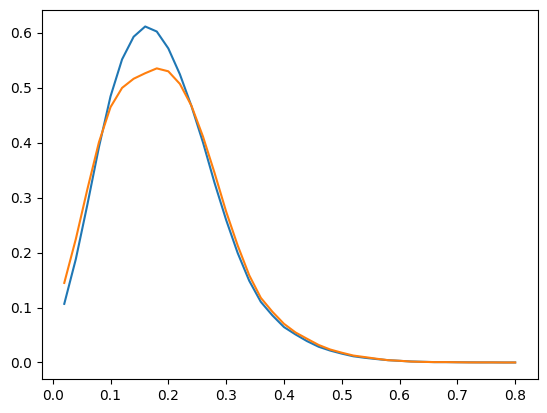

In [11]:
rho1_rg = np.arange(0.02, 0.81, 0.02)
plt.plot(rho1_rg, f1_rho1_iddn)
plt.plot(rho1_rg, f1_rho1_jgl)


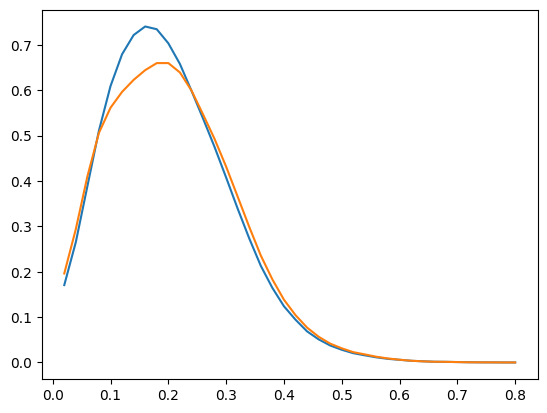

In [12]:
plt.plot(rho1_rg, f1_rho1_iddn_pc)
plt.plot(rho1_rg, f1_rho1_jgl_pc)

## Try iDINGO

In [22]:
# TODO: get common network
f_idingo = f"{top_folder_R}/sim_output/{exp_name}_idingo_sample_{n_sample_work}_sigma_{sigma_add}_3as2_layer.hdf5"

diff_idingo = tool_eval.read_res_h5(f_idingo, tt=True, key="diffscore")
g1_idingo = tool_eval.read_res_h5(f_idingo, tt=True, key="R1")
g2_idingo = tool_eval.read_res_h5(f_idingo, tt=True, key="R2")


['R1', 'R2', 'diffscore']
(5, 150, 150)
['R1', 'R2', 'diffscore']
(5, 150, 150)
['R1', 'R2', 'diffscore']
(5, 150, 150)


In [29]:
reload(tool_eval)
res_comm_idingo, res_diff_idingo = tool_eval.gather_res_dingo(g1_idingo, g2_idingo, diff_idingo, comm_gt, diff_gt, msk_in=msk)
